### Code by Denis Loechel as part of master thesis on synthetic data generation

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import locale
import scipy.stats as stats
from scipy.stats import anderson
import numbers
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder

## Importing dataset and evaluating the dataset

In [2]:
#Uploading our HR CSV file
data = pd.read_csv("20230301_HR_dataset.csv")

In [440]:
# Checking the columns
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [441]:
# Checking on the data types 
data.dtypes

# Please note that the "Salary_formatted" column only exists to label plots later on. 

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [442]:
# Checking the DataFrame
data.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [10]:
# Preliminary value checks 1
data["CitizenDesc"].value_counts()

2    295
0     12
1      4
Name: CitizenDesc, dtype: int64

In [11]:
# Preliminary value checks 2
data["Termd"].value_counts()

0    207
1    104
Name: Termd, dtype: int64

In [443]:
# Preliminary value checks 3
data["GenderID"].value_counts()

0    176
1    135
Name: GenderID, dtype: int64

In [444]:
# Preliminary value checks 4
data["DeptID"].value_counts()

5    208
3     50
6     32
4     10
1     10
2      1
Name: DeptID, dtype: int64

In [445]:
# Preliminary value checks 5
data["MarriedID"].value_counts()

0    187
1    124
Name: MarriedID, dtype: int64

/var/folders/wf/tyg0hnw967l_fcprpw9pt1f80000gn/T/ipykernel_2386/2641086131.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


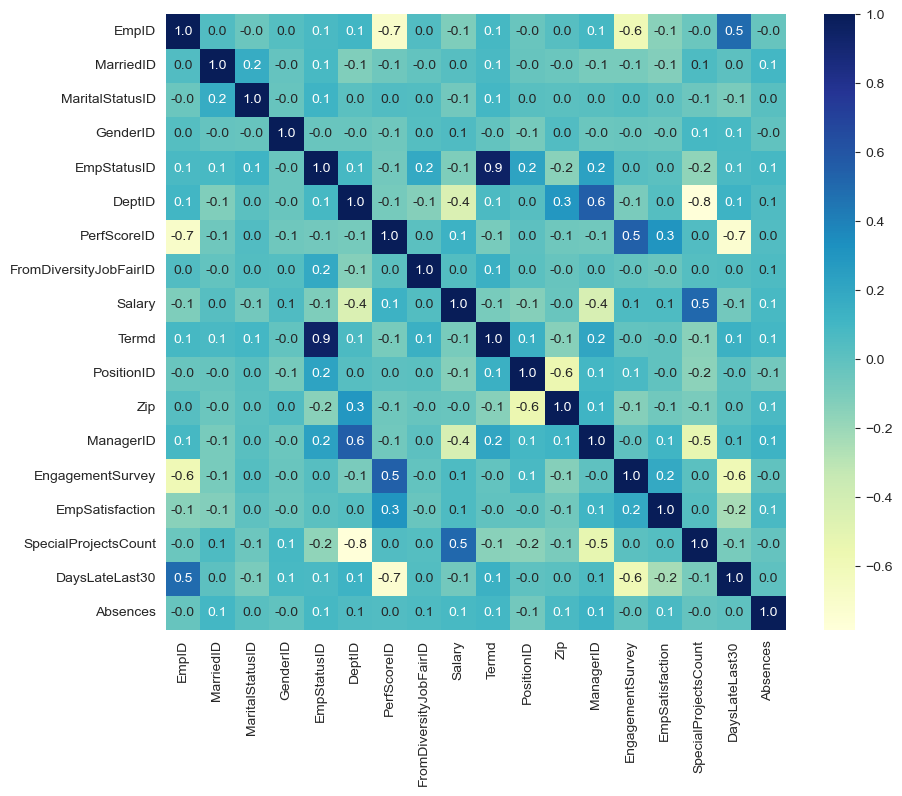

In [446]:
# Quick correlation check
corr = data.corr()
plt.figure(figsize=(10,8))  # making the heatmap bigger 
sns.heatmap(corr, annot=True, cmap = "YlGnBu", fmt='.1f') 
plt.show()

# Reference Tables for our orginal dataset

### Department and Department ID

In [447]:
# Creation of reference table
dept_df = pd.DataFrame({'DeptID': data['DeptID'],'Department': data['Department']})

unique_depts = dept_df.drop_duplicates(subset=['DeptID', 'Department'])
# set DeptID as index
dept_df.set_index('DeptID', inplace=True)

# display the key-value pair dataframe
print(tabulate(unique_depts, headers=["Index", "DeptID", "Department"], tablefmt='fancy_grid'))

╒═════════╤══════════╤══════════════════════╕
│   Index │   DeptID │ Department           │
╞═════════╪══════════╪══════════════════════╡
│       0 │        5 │ Production           │
├─────────┼──────────┼──────────────────────┤
│       1 │        3 │ IT/IS                │
├─────────┼──────────┼──────────────────────┤
│       6 │        4 │ Software Engineering │
├─────────┼──────────┼──────────────────────┤
│      26 │        1 │ Admin Offices        │
├─────────┼──────────┼──────────────────────┤
│      32 │        6 │ Sales                │
├─────────┼──────────┼──────────────────────┤
│      64 │        6 │ Production           │
├─────────┼──────────┼──────────────────────┤
│     150 │        2 │ Executive Office     │
├─────────┼──────────┼──────────────────────┤
│     227 │        1 │ Software Engineering │
╘═════════╧══════════╧══════════════════════╛


### Position and Position ID

In [449]:
# Creation of reference table
dept_df = pd.DataFrame({'PositionID': data['PositionID'],'Position': data['Position']})

unique_depts = dept_df.drop_duplicates(subset=['PositionID', 'Position'])
# set DeptID as index
dept_df.set_index('PositionID', inplace=True)

# display the key-value pair dataframe
print(tabulate(unique_depts, headers=["Index", "PositionID", "Position"], tablefmt='fancy_grid'))

╒═════════╤══════════════╤══════════════════════════════╕
│   Index │   PositionID │ Position                     │
╞═════════╪══════════════╪══════════════════════════════╡
│       0 │           19 │ Production Technician I      │
├─────────┼──────────────┼──────────────────────────────┤
│       1 │           27 │ Sr. DBA                      │
├─────────┼──────────────┼──────────────────────────────┤
│       2 │           20 │ Production Technician II     │
├─────────┼──────────────┼──────────────────────────────┤
│       6 │           24 │ Software Engineer            │
├─────────┼──────────────┼──────────────────────────────┤
│       9 │           14 │ IT Support                   │
├─────────┼──────────────┼──────────────────────────────┤
│      12 │            9 │ Data Analyst                 │
├─────────┼──────────────┼──────────────────────────────┤
│      18 │            8 │ Database Administrator       │
├─────────┼──────────────┼──────────────────────────────┤
│      25 │   

### Updating the dataset

In [450]:
# Dropping columns that are not needed for synthetic data evaluation
data = data.drop(["Position", "Department", "ManagerName", "EmpStatusID", "MaritalDesc", "PerfScoreID", "MaritalStatusID", "FromDiversityJobFairID", "Zip", "HispanicLatino", "ManagerName", "EngagementSurvey", "RaceDesc", "State", "TermReason", "RecruitmentSource", "PerformanceScore", "EmploymentStatus"], axis=1)

In [451]:
# Checking the updated DataFrame columns
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'GenderID', 'DeptID', 'Salary',
       'Termd', 'PositionID', 'DOB', 'Sex', 'CitizenDesc', 'DateofHire',
       'DateofTermination', 'ManagerID', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [452]:
# Checking the DataFrame again
data.head()

,Employee_Name,EmpID,MarriedID,GenderID,DeptID,Salary,Termd,PositionID,DOB,Sex,CitizenDesc,DateofHire,DateofTermination,ManagerID,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,1,5,62506,0,19,07/10/83,M,US Citizen,7/5/2011,NaN,22.0,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,3,104437,1,27,05/05/75,M,US Citizen,3/30/2015,6/16/2016,4.0,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,0,5,64955,1,20,09/19/88,F,US Citizen,7/5/2011,9/24/2012,20.0,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,0,5,64991,0,19,09/27/88,F,US Citizen,1/7/2008,NaN,16.0,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,0,5,50825,1,19,09/08/89,F,US Citizen,7/11/2011,9/6/2016,39.0,4,0,2/1/2016,0,2


In [453]:
# Converting the DOB column so that we can chart it
data["DOB"] = pd.to_datetime(data["DOB"])

# Converting the Date of Hire column so that we can chart it
data["DateofHire"] = pd.to_datetime(data["DateofHire"])

# Converting the Date of Termination column so that we can chart it
data["DateofTermination"] = pd.to_datetime(data["DateofTermination"])

# Converting the Date Last Performance Review column so that we can chart it
data["LastPerformanceReview_Date"] = pd.to_datetime(data["LastPerformanceReview_Date"])

In [454]:
# Printing the data types
print(data.dtypes)

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
GenderID                               int64
DeptID                                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
DOB                           datetime64[ns]
Sex                                   object
CitizenDesc                           object
DateofHire                    datetime64[ns]
DateofTermination             datetime64[ns]
ManagerID                            float64
EmpSatisfaction                        int64
SpecialProjectsCount                   int64
LastPerformanceReview_Date    datetime64[ns]
DaysLateLast30                         int64
Absences                               int64
dtype: object


In [455]:
# Converting the DOB column to get the birth year
data["BirthYear"] = pd.to_datetime(data["DOB"], format='%m/%d/%y').dt.strftime("19%y").astype(int) #dt.strtime makes sure that nobody is born in the year 20%y as the date format is mm/dd/yy instead of mm/dd/yyyy

# Converting the Date of Termination column to get the date of termination year
data["YearofTermination"] = pd.to_datetime(data["DateofTermination"], format='%m/%d/%y').dt.strftime("%Y")
data["YearofTermination"].fillna("-1", inplace=True) # since not everybody was fired this converts all the NaN values to -1
data["YearofTermination"] = data["YearofTermination"].astype(int)

# Converting the Date of Hire column to get the date of hire year
data["YearofHire"] = pd.to_datetime(data["DateofHire"], format='%m/%d/%y').dt.strftime("%Y").astype(int)

# Converting the Last Performance Review data column to get the year of the performance review
data["YearofPerformanceReview"] = pd.to_datetime(data["LastPerformanceReview_Date"], format='%m/%d/%y').dt.strftime("%Y").astype(int)

# Creating a Years in Company column
data["YearsinCompany"] = data['YearofTermination'] - data['YearofHire']
data.loc[data['YearsinCompany'] < 0, 'YearsinCompany'] = 0 
data["YearsinCompany"] = data["YearsinCompany"].fillna(0).astype(int)

In [456]:
# Checking the value counts of our Birth Year column
data["YearsinCompany"].value_counts()

0    211
1     20
3     20
4     17
5     14
2     13
6      8
7      7
9      1
Name: YearsinCompany, dtype: int64

In [457]:
# Lets have a look at the dataset again
data.head(10)

,Employee_Name,EmpID,MarriedID,GenderID,DeptID,Salary,Termd,PositionID,DOB,Sex,...,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,BirthYear,YearofTermination,YearofHire,YearofPerformanceReview,YearsinCompany
0,"Adinolfi, Wilson K",10026,0,1,5,62506,0,19,1983-07-10,M,...,5,0,2019-01-17,0,1,1983,-1,2011,2019,0
1,"Ait Sidi, Karthikeyan",10084,1,1,3,104437,1,27,1975-05-05,M,...,3,6,2016-02-24,0,17,1975,2016,2015,2016,1
2,"Akinkuolie, Sarah",10196,1,0,5,64955,1,20,1988-09-19,F,...,3,0,2012-05-15,0,3,1988,2012,2011,2012,1
3,"Alagbe,Trina",10088,1,0,5,64991,0,19,1988-09-27,F,...,5,0,2019-01-03,0,15,1988,-1,2008,2019,0
4,"Anderson, Carol",10069,0,0,5,50825,1,19,1989-09-08,F,...,4,0,2016-02-01,0,2,1989,2016,2011,2016,5
5,"Anderson, Linda",10002,0,0,5,57568,0,19,1977-05-22,F,...,5,0,2019-01-07,0,15,1977,-1,2012,2019,0
6,"Andreola, Colby",10194,0,0,4,95660,0,24,1979-05-24,F,...,3,4,2019-01-02,0,19,1979,-1,2014,2019,0
7,"Athwal, Sam",10062,0,1,5,59365,0,19,1983-02-18,M,...,4,0,2019-02-25,0,19,1983,-1,2013,2019,0
8,"Bachiochi, Linda",10114,0,0,5,47837,0,19,2070-02-11,F,...,3,0,2019-01-25,0,4,1970,-1,2009,2019,0
9,"Bacong, Alejandro",10250,0,1,3,50178,0,14,1988-01-07,M,...,5,6,2019-02-18,0,16,1988,-1,2015,2019,0


In [458]:
# Let's check all columns again
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'GenderID', 'DeptID', 'Salary',
       'Termd', 'PositionID', 'DOB', 'Sex', 'CitizenDesc', 'DateofHire',
       'DateofTermination', 'ManagerID', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'BirthYear', 'YearofTermination', 'YearofHire',
       'YearofPerformanceReview', 'YearsinCompany'],
      dtype='object')

In [459]:
# Let's drop the rest of the columns we dont need anymore
data = data.drop(["Employee_Name", "DOB", "Sex", "DateofTermination", "DateofTermination", "DateofHire", "LastPerformanceReview_Date", ], axis=1)

In [460]:
# Checking to see if we can streamline further
data.head(10)

,EmpID,MarriedID,GenderID,DeptID,Salary,Termd,PositionID,CitizenDesc,ManagerID,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,BirthYear,YearofTermination,YearofHire,YearofPerformanceReview,YearsinCompany
0,10026,0,1,5,62506,0,19,US Citizen,22.0,5,0,0,1,1983,-1,2011,2019,0
1,10084,1,1,3,104437,1,27,US Citizen,4.0,3,6,0,17,1975,2016,2015,2016,1
2,10196,1,0,5,64955,1,20,US Citizen,20.0,3,0,0,3,1988,2012,2011,2012,1
3,10088,1,0,5,64991,0,19,US Citizen,16.0,5,0,0,15,1988,-1,2008,2019,0
4,10069,0,0,5,50825,1,19,US Citizen,39.0,4,0,0,2,1989,2016,2011,2016,5
5,10002,0,0,5,57568,0,19,US Citizen,11.0,5,0,0,15,1977,-1,2012,2019,0
6,10194,0,0,4,95660,0,24,US Citizen,10.0,3,4,0,19,1979,-1,2014,2019,0
7,10062,0,1,5,59365,0,19,US Citizen,19.0,4,0,0,19,1983,-1,2013,2019,0
8,10114,0,0,5,47837,0,19,US Citizen,12.0,3,0,0,4,1970,-1,2009,2019,0
9,10250,0,1,3,50178,0,14,US Citizen,7.0,5,6,0,16,1988,-1,2015,2019,0


In [461]:
# Using SkLearn Label Encoder to one hot encode Citizen Desc
le = LabelEncoder()

data['CitizenDesc'] = le.fit_transform(data['CitizenDesc'])

label_transformation_citizen = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_transformation_citizen)

# Changing the ManagerID column from float to int and filling NaN with -1 values
data['ManagerID'] = data['ManagerID'].fillna(-1).astype(int)

{'Eligible NonCitizen': 0, 'Non-Citizen': 1, 'US Citizen': 2}


In [462]:
# Final Check
data.head(10)

,EmpID,MarriedID,GenderID,DeptID,Salary,Termd,PositionID,CitizenDesc,ManagerID,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,BirthYear,YearofTermination,YearofHire,YearofPerformanceReview,YearsinCompany
0,10026,0,1,5,62506,0,19,2,22,5,0,0,1,1983,-1,2011,2019,0
1,10084,1,1,3,104437,1,27,2,4,3,6,0,17,1975,2016,2015,2016,1
2,10196,1,0,5,64955,1,20,2,20,3,0,0,3,1988,2012,2011,2012,1
3,10088,1,0,5,64991,0,19,2,16,5,0,0,15,1988,-1,2008,2019,0
4,10069,0,0,5,50825,1,19,2,39,4,0,0,2,1989,2016,2011,2016,5
5,10002,0,0,5,57568,0,19,2,11,5,0,0,15,1977,-1,2012,2019,0
6,10194,0,0,4,95660,0,24,2,10,3,4,0,19,1979,-1,2014,2019,0
7,10062,0,1,5,59365,0,19,2,19,4,0,0,19,1983,-1,2013,2019,0
8,10114,0,0,5,47837,0,19,2,12,3,0,0,4,1970,-1,2009,2019,0
9,10250,0,1,3,50178,0,14,2,7,5,6,0,16,1988,-1,2015,2019,0


In [463]:
# Saving the updated DataFrame in a CSV file
#data.to_csv("20230308_Updated_HR_dataset.csv", index=False)

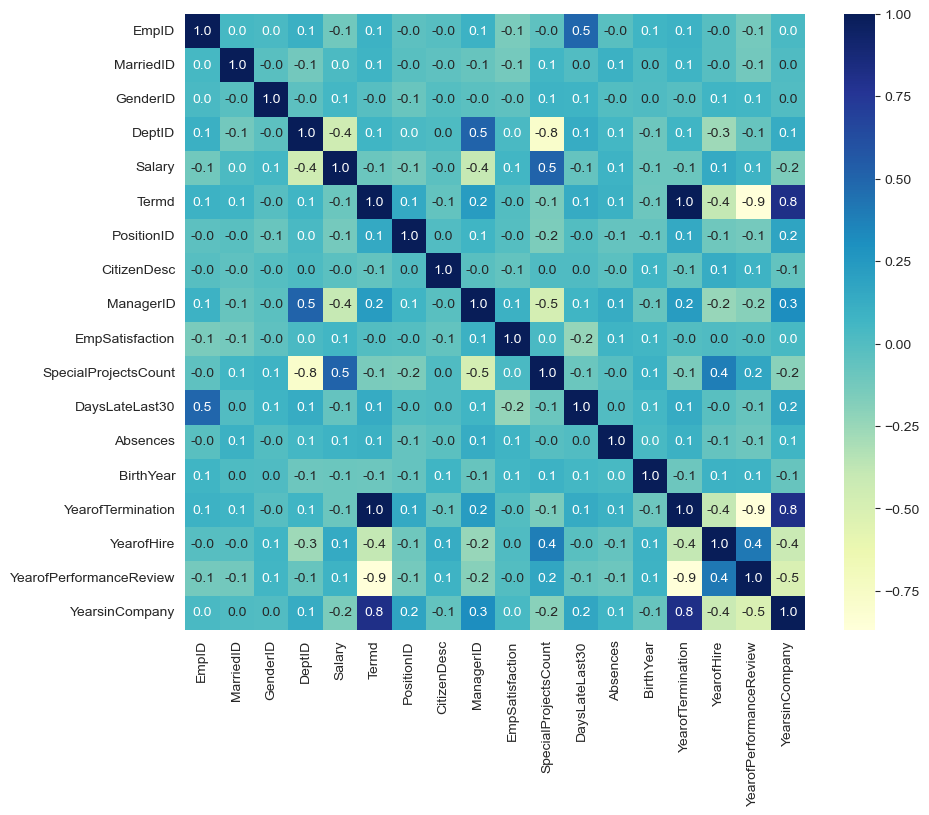

In [464]:
# Another quick correlation check
corr = data.corr()
plt.figure(figsize=(10,8))  # making the heatmap bigger 
sns.heatmap(corr, annot=True, cmap = "YlGnBu", fmt=".1f") 
plt.show()

# Further Data Visualization

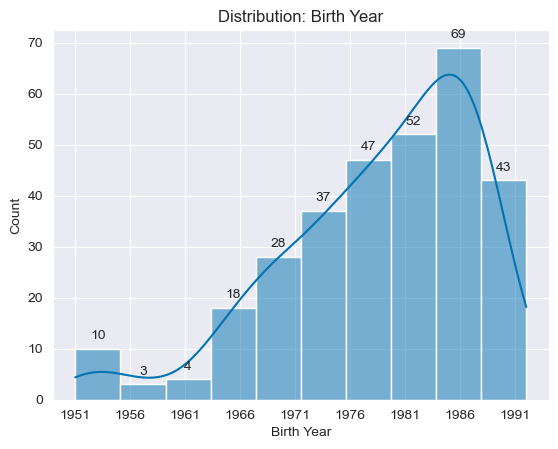

In [482]:
# Creation of histogram plot for birth year with KDE and 10 bins 
"""
The aim of this and not using the hist plot function defined beforehand, is that I want to make use
of the number of bins for the Birth Year column that I created earlier while plotting a KDE on top.
"""
# Number of bins 
n_bins = 10

# Histogram creation
ax = sns.histplot(data["BirthYear"], kde=True, bins=n_bins)

# Annotation of histogram 
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords="offset points", ha="center", va="bottom")

# Setting x,y labels and title 
plt.xlabel("Birth Year")
plt.ylabel("Count")
plt.title("Distribution: Birth Year")

# Setting Birth Year labels for the x-axis
plt.xticks(np.arange(data["BirthYear"].min(), data["BirthYear"].max()+1, step=5))

# Visualization
plt.show()


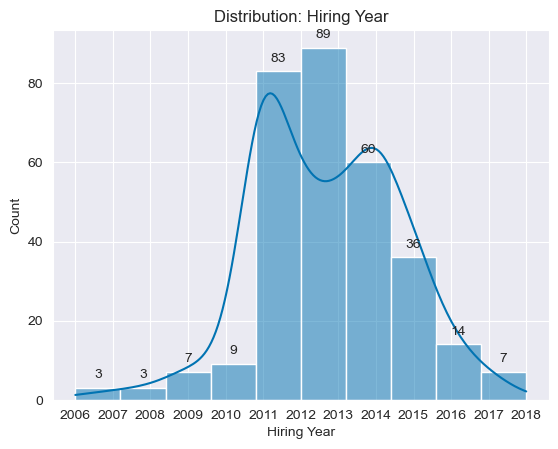

In [483]:
# Creation of histogram plot for year of hire with KDE and 10 bins 
"""
The aim of this and not using the hist plot function defined beforehand, is that I want to make use
of the number of bins for the year of hire column that I created earlier while plotting a KDE on top.
"""
# Number of bins 
n_bins = 10

# Histogram creation
ax = sns.histplot(data["YearofHire"], kde=True, bins=n_bins)

# Annotation of histogram 
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords="offset points", ha="center", va="bottom")

# Setting x,y labels and title 
plt.xlabel("Hiring Year")
plt.ylabel("Count")
plt.title("Distribution: Hiring Year")

# Setting Birth Year labels for the x-axis
plt.xticks(np.arange(data["YearofHire"].min(), data["YearofHire"].max()+1, step=1))

# Visualization
plt.show()

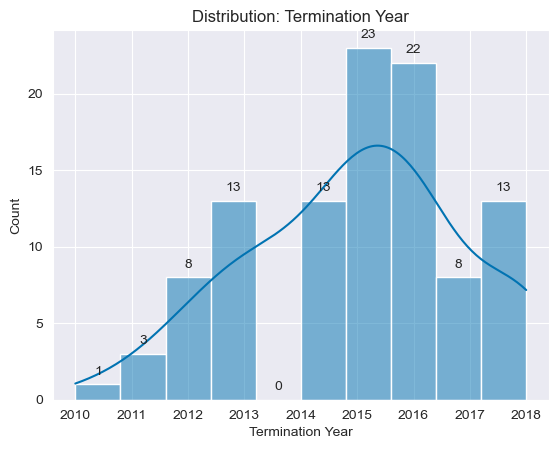

In [484]:
# Creation of histogram plot for Year of Termination with KDE and 10 bins 
"""
The aim of this and not using the hist plot function defined beforehand, is that I want to make use
of the number of bins for the year of termination column that I created earlier while plotting a KDE on top.
"""
# Number of bins 
n_bins = 10

# Lets filter out the -1 values
year_of_termination = data["YearofTermination"][data["YearofTermination"] != -1]

# Histogram creation
ax = sns.histplot(year_of_termination, kde=True, bins=n_bins)

# Annotation of histogram 
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords="offset points", ha="center", va="bottom")

# Setting x,y labels and title 
plt.xlabel("Termination Year")
plt.ylabel("Count")
plt.title("Distribution: Termination Year")

# Setting termination year labels for the x-axis
plt.xticks(np.arange(year_of_termination.min(), year_of_termination.max()+1, step=1))

# Visualization
plt.show()

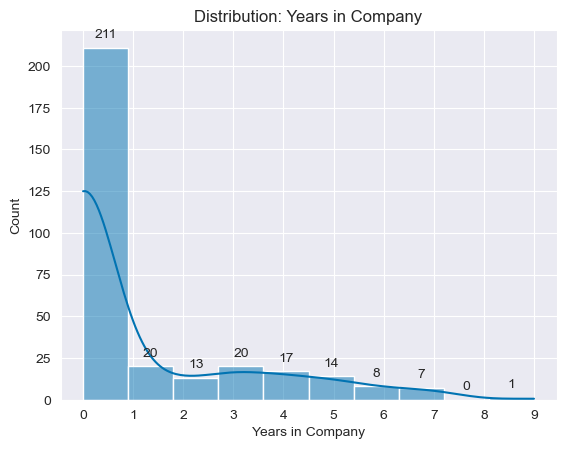

In [485]:
# Creation of histogram plot for Year of Termination with KDE and 10 bins 
"""
Let's do the same function as the termination year above but for Years in Company
"""
# Number of bins 
n_bins = 10

# Lets filter out the -1 values
years_in_company = data["YearsinCompany"][data["YearsinCompany"] != -1]

# Histogram creation
ax = sns.histplot(years_in_company, kde=True, bins=n_bins)

# Annotation of histogram 
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords="offset points", ha="center", va="bottom")

# Setting x,y labels and title 
plt.xlabel("Years in Company")
plt.ylabel("Count")
plt.title("Distribution: Years in Company")

# Setting termination year labels for the x-axis
plt.xticks(np.arange(years_in_company.min(), years_in_company.max()+1, step=1))

# Visualization
plt.show()

# Statistical Normality Tests 

In [6]:
# Importing our updated dataset
data = pd.read_csv("20230308_Updated_HR_dataset.csv")

## Function: Anderson Normality Distribution Testing

In [7]:
def a_normality_test(data, column):
    """
    The aim of this function is to test for normality in the distribution using the Anderson-Darling method
    from SciPy. 
    """
    # Performing Anderson-Darling normality testing on any column
    a_analysis = anderson(data[column])

    # List creation and appending the list
    a_analysis_result = []
    a_analysis_result.append(["Anderson-Darling test statistic", f"{a_analysis.statistic:.4f}"])
    a_analysis_result.append(["Critical values", str(a_analysis.critical_values)])
    a_analysis_result.append(["Significance levels", str(a_analysis.significance_level)])
    if a_analysis.statistic < a_analysis.critical_values[2]:
        a_analysis_result.append(["Interpretation", "The distribution is likely normal"])
    else:
        a_analysis_result.append(["Interpretation", "The distribution is likely not normal"])

    # Printing it a nicer format using tabulate
    print(tabulate(a_analysis_result, headers=['Test', 'Result'], tablefmt='fancy_grid'))

### Testing: CitizenDesc

In [8]:
# Printing result for Birth Year
a_normality_test(data, "CitizenDesc")

╒═════════════════════════════════╤═══════════════════════════════════════╕
│ Test                            │ Result                                │
╞═════════════════════════════════╪═══════════════════════════════════════╡
│ Anderson-Darling test statistic │ 110.1759                              │
├─────────────────────────────────┼───────────────────────────────────────┤
│ Critical values                 │ [0.569 0.648 0.777 0.907 1.078]       │
├─────────────────────────────────┼───────────────────────────────────────┤
│ Significance levels             │ [15.  10.   5.   2.5  1. ]            │
├─────────────────────────────────┼───────────────────────────────────────┤
│ Interpretation                  │ The distribution is likely not normal │
╘═════════════════════════════════╧═══════════════════════════════════════╛


### Testing: Hiring Year

In [9]:
a_normality_test(data, "Termd")

╒═════════════════════════════════╤═══════════════════════════════════════╕
│ Test                            │ Result                                │
╞═════════════════════════════════╪═══════════════════════════════════════╡
│ Anderson-Darling test statistic │ 63.9319                               │
├─────────────────────────────────┼───────────────────────────────────────┤
│ Critical values                 │ [0.569 0.648 0.777 0.907 1.078]       │
├─────────────────────────────────┼───────────────────────────────────────┤
│ Significance levels             │ [15.  10.   5.   2.5  1. ]            │
├─────────────────────────────────┼───────────────────────────────────────┤
│ Interpretation                  │ The distribution is likely not normal │
╘═════════════════════════════════╧═══════════════════════════════════════╛


### Testing: Salary

In [490]:
# Printing result for Salary
a_normality_test(data, "Salary")

╒═════════════════════════════════╤═══════════════════════════════════════╕
│ Test                            │ Result                                │
╞═════════════════════════════════╪═══════════════════════════════════════╡
│ Anderson-Darling test statistic │ 24.5064                               │
├─────────────────────────────────┼───────────────────────────────────────┤
│ Critical values                 │ [0.569 0.648 0.777 0.907 1.078]       │
├─────────────────────────────────┼───────────────────────────────────────┤
│ Significance levels             │ [15.  10.   5.   2.5  1. ]            │
├─────────────────────────────────┼───────────────────────────────────────┤
│ Interpretation                  │ The distribution is likely not normal │
╘═════════════════════════════════╧═══════════════════════════════════════╛


# Documentation Sources for Reference

Pandas: https://pandas.pydata.org/docs/, Numpy: https://numpy.org/doc/, Matplotlib: https://matplotlib.org/stable/index.html, Seaborn: https://seaborn.pydata.org, Locale: https://docs.python.org/3/library/locale.html, Numbers: https://docs.python.org/3/library/numbers.html, SciPy: https://docs.scipy.org/doc/scipy/, Tabulate: https://pypi.org/project/tabulate/, Kaggle: https://www.kaggle.com/datasets/rhuebner/human-resources-data-set